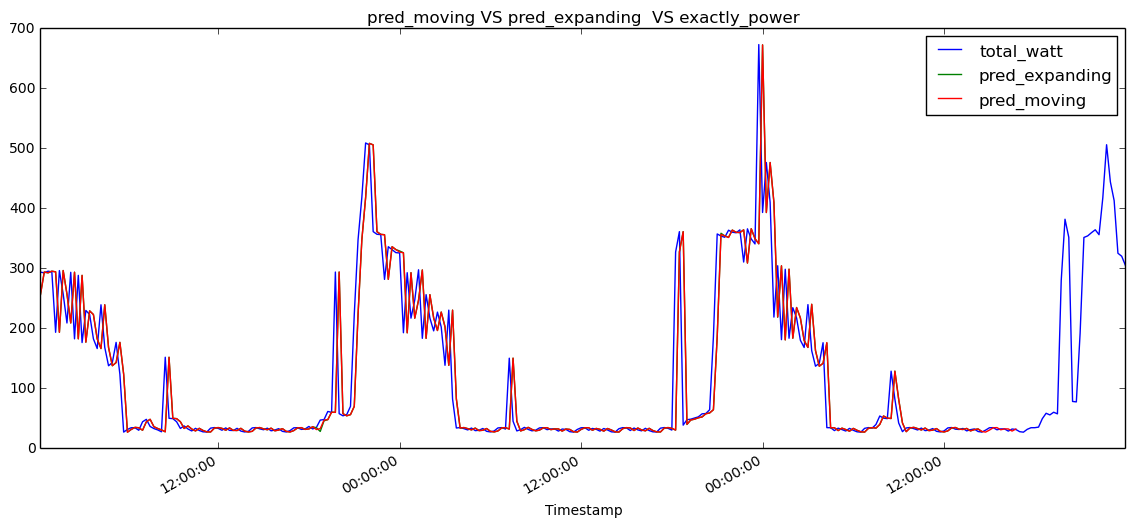

In [1]:
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import MySQLdb
import numpy as np
import time
import sys
import datetime 
from datetime import datetime
from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statistics 
%matplotlib inline

conn = MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

query_expand = "SELECT * FROM thesis.predict_expanding1 WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2016-10-03 00:00:00","2016-10-05 23:59:59")
query_moving = "SELECT * FROM thesis.predict_moving1 WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2016-10-03 00:00:00","2016-10-05 23:59:59")
query = "SELECT Timestamp, total_watt FROM thesis.load WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2016-10-03 00:00:00","2016-10-05 23:59:59")

df_expand= pd.read_sql(query_expand , conn , index_col=['Timestamp'])
df_moving   = pd.read_sql(query_moving  , conn , index_col=['Timestamp'])
df = pd.read_sql(query, conn , index_col=['Timestamp'])

df['pred_expanding'] = df_expand.watt
df['pred_moving'] = df_moving.watt

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('pred_moving VS pred_expanding  VS exactly_power')
df.plot(ax=ax)
plt.show()


In [59]:
##### EXPANDING 
from sklearn.metrics import mean_absolute_error,mean_squared_error
df.APE_ex = (np.abs((df.total_watt-df_expand.watt)/df.total_watt))*100
MAPE_ex = np.mean(df.APE_ex)
# df.to_csv('out.csv')

print "EXPANDING ___________________________"
print "% MEAN ABSOLUTE PERCENT ERROR :",MAPE_ex, "%"
print "Size of Data_excatly_load: ", len(df) , " Day =", len(df)/96
print "Size of Data_pred_load   : ", len(df_expand.watt) , " Day =", len(df_expand.watt)/96
print "\n"


##### EXPANDING 
from sklearn.metrics import mean_absolute_error,mean_squared_error
df.APE_mo = (np.abs((df.total_watt-df_moving.watt)/df.total_watt))*100
MAPE_mo = np.mean(df.APE_mo)
# df.to_csv('out.csv')


print "MOVING ________________________________"
print "% MEAN ABSOLUTE PERCENT ERROR :",MAPE_mo, "%"
print "Size of Data_excatly_load: ", len(df) , " Day =", len(df)/96
print "Size of Data_pred_load   : ", len(df_moving.watt) , " Day =", len(df_moving.watt)/96

EXPANDING ___________________________
% MEAN ABSOLUTE PERCENT ERROR : 36.4671301613 %
Size of Data_excatly_load:  96  Day = 1
Size of Data_pred_load   :  96  Day = 1


MOVING ________________________________
% MEAN ABSOLUTE PERCENT ERROR : 36.4946795515 %
Size of Data_excatly_load:  96  Day = 1
Size of Data_pred_load   :  96  Day = 1


In [60]:
result = pd.concat([df.total_watt, df_moving.watt,df.APE_mo], axis=1, join='inner')   
print result

                     total_watt      watt           0
Timestamp                                            
2016-10-01 00:14:59    305.6920  315.5690    3.231030
2016-10-01 00:29:59    293.3880  305.6770    4.188651
2016-10-01 00:44:59    189.6460  293.3260   54.670280
2016-10-01 00:59:59    297.1960  189.6620   36.182856
2016-10-01 01:14:59    287.4790  297.4520    3.469123
2016-10-01 01:29:59    177.0250  287.5560   62.438074
2016-10-01 01:44:59    295.8420  177.0680   40.147782
2016-10-01 01:59:59    178.2420  295.8760   65.996791
2016-10-01 02:14:59    289.7210  178.4080   38.420757
2016-10-01 02:29:59    174.4790  289.3570   65.840588
2016-10-01 02:44:59    266.8170  174.4910   34.602743
2016-10-01 02:59:59    191.0120  266.7450   39.648294
2016-10-01 03:14:59    179.4460  190.9920    6.434248
2016-10-01 03:29:59    197.4580  179.7140    8.986215
2016-10-01 03:44:59    231.0290  197.7400   14.409014
2016-10-01 03:59:59    144.7580  231.3030   59.785988
2016-10-01 04:14:59    139.5

                            OLS Regression Results                            
Dep. Variable:             total_watt   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sat, 27 May 2017   Prob (F-statistic):           3.86e-32
Time:                        19:38:07   Log-Likelihood:                -1139.1
No. Observations:                 192   AIC:                             2282.
Df Residuals:                     190   BIC:                             2289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3819      9.358      3.995      0.0

(-0.5, 1600)

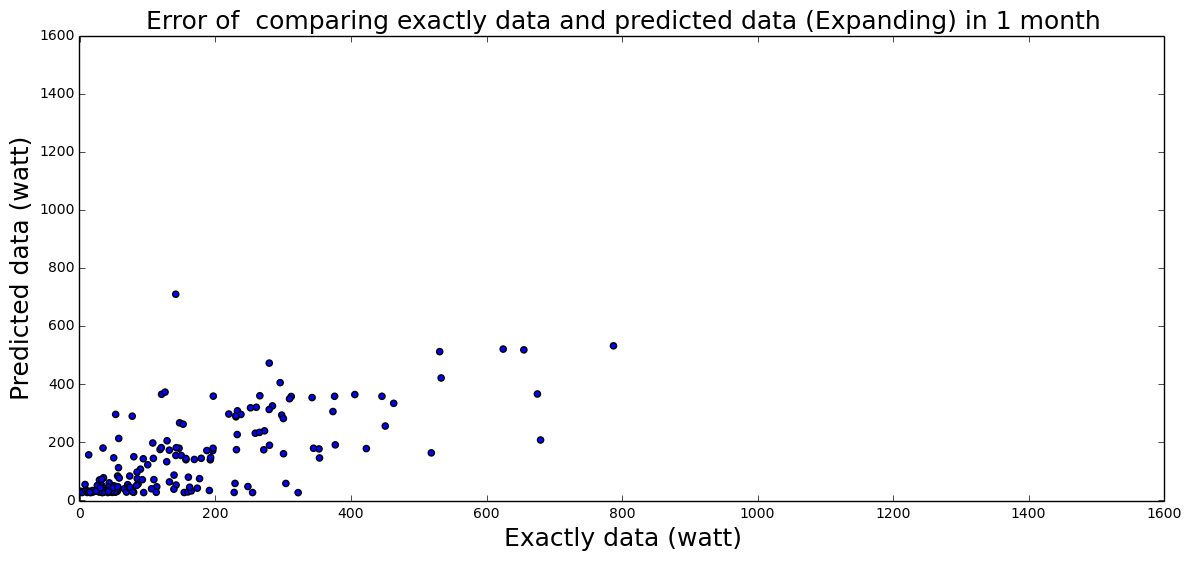

In [61]:
### EAPANDING
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import MySQLdb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statistics 
%matplotlib inline 
%matplotlib inline 

conn = MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

query_expand = "SELECT * FROM thesis.predict1 WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2016-10-01 00:00:00","2016-10-02 23:59:59")
df_expand = pd.read_sql(query_expand , conn , index_col=['Timestamp'])

query = "SELECT Timestamp, total_watt FROM thesis.load WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2016-10-01 00:00:00","2016-10-02 23:59:59")
df = pd.read_sql(query, conn , index_col=['Timestamp'])

X = df_expand.watt
Y = df.total_watt

results = sm.OLS(Y,sm.add_constant(X)).fit()
print results.summary()
plt.figure(figsize=(14,6))
plt.scatter(X,Y)
X_plot = np.linspace(0,1000,1)
plt.plot(X_plot, X_plot*results.params[0] + results.params[1])
plt.title('Error of  comparing exactly data and predicted data (Expanding) in 1 month',fontsize=18)
plt.xlabel('Exactly data (watt)',fontsize=18)
plt.ylabel('Predicted data (watt)',fontsize=18)
# plt.show()
plt.ylim((-0.5,1600))
plt.xlim((-0.5,1600))

                            OLS Regression Results                            
Dep. Variable:                   watt   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sat, 27 May 2017   Prob (F-statistic):           3.86e-32
Time:                        19:38:15   Log-Likelihood:                -1161.7
No. Observations:                 192   AIC:                             2327.
Df Residuals:                     190   BIC:                             2334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6683     10.556      3.852      0.0

(-0.5, 1600)

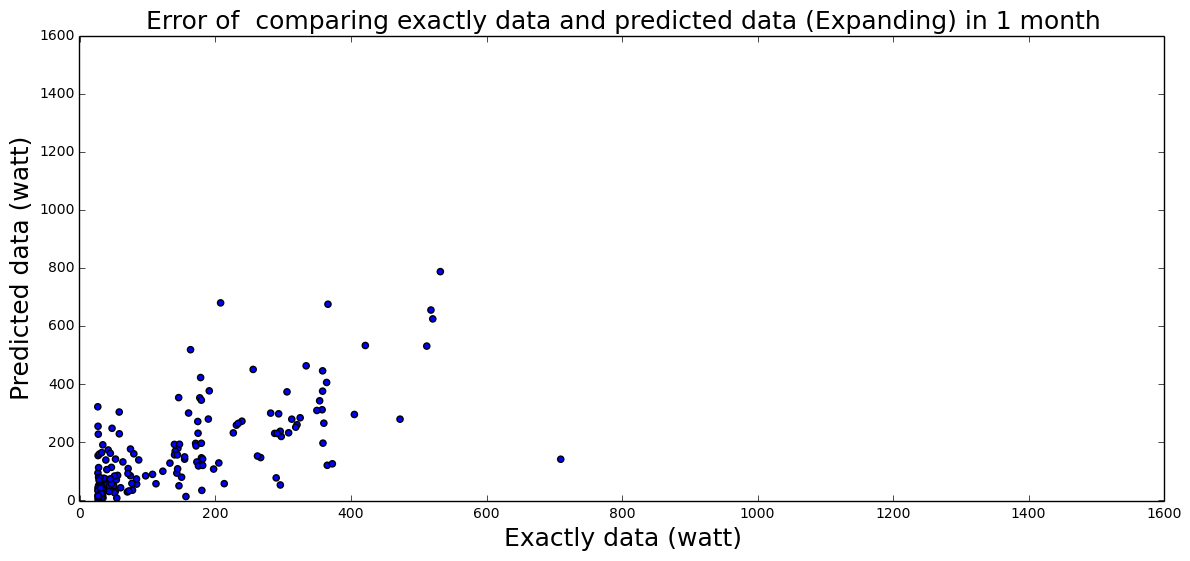

In [62]:
### MOVING
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import MySQLdb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statistics 
%matplotlib inline 
%matplotlib inline 

conn = MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

query_moving= "SELECT * FROM thesis.predict2 WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2016-10-01 00:00:00","2016-10-02 23:59:59")
df_moving= pd.read_sql(query_expand , conn , index_col=['Timestamp'])

query = "SELECT Timestamp, total_watt FROM thesis.load WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2016-10-01 00:00:00","2016-10-02 23:59:59")
df = pd.read_sql(query, conn , index_col=['Timestamp'])

X = df.total_watt
Y = df_moving.watt


results = sm.OLS(Y,sm.add_constant(X)).fit()
print results.summary()
plt.figure(figsize=(14,6))
plt.scatter(X,Y)
X_plot = np.linspace(0,1000,1)
plt.plot(X_plot, X_plot*results.params[0] + results.params[1])
plt.title('Error of  comparing exactly data and predicted data (Expanding) in 1 month',fontsize=18)
plt.xlabel('Exactly data (watt)',fontsize=18)
plt.ylabel('Predicted data (watt)',fontsize=18)
# plt.show()
plt.ylim((-0.5,1600))
plt.xlim((-0.5,1600))